In [5]:
MSV: 21083791
Ho ten: Lê Hoàng Khang
So may: 30
Diem: 11 1-4-3-3

SyntaxError: invalid syntax (3632780635.py, line 2)

In [6]:
# Câu 1

import pandas as pd
import matplotlib.pyplot as plt

df_penguins = pd.read_csv('penguins-data.csv')

df_penguins.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
5,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
6,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
7,12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
8,13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
9,14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [8]:
# Câu 2a. Tính số lượng chim cánh cụt theo loài
penguins_species = df_penguins['species'].value_counts()
penguins_species

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [20]:
# Câu 2b. Tính số lượng chim cánh cụt theo loài trên các đảo
penguin_counts = df_penguins.groupby(['island', 'species']).size()

pivot_table = penguin_counts.unstack()
print(pivot_table)

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe       44.0        NaN   119.0
Dream        55.0       68.0     NaN
Torgersen    47.0        NaN     NaN


In [24]:
# 2c. 
statistics = df_penguins.groupby('species').agg({
    'bill_length_mm': ['mean', 'median', 'std'],
    'bill_depth_mm': ['mean', 'median', 'std'],
    'flipper_length_mm': ['mean', 'median', 'std'],
    'body_mass_g': ['mean', 'median', 'std']
})

pivot_table = statistics.unstack()

print(pivot_table)

                           species  
bill_length_mm     mean    Adelie         38.823973
                           Chinstrap      48.833824
                           Gentoo         47.568067
                   median  Adelie         38.850000
                           Chinstrap      49.550000
                           Gentoo         47.400000
                   std     Adelie          2.662597
                           Chinstrap       3.339256
                           Gentoo          3.106116
bill_depth_mm      mean    Adelie         18.347260
                           Chinstrap      18.420588
                           Gentoo         14.996639
                   median  Adelie         18.400000
                           Chinstrap      18.450000
                           Gentoo         15.000000
                   std     Adelie          1.219338
                           Chinstrap       1.135395
                           Gentoo          0.985998
flipper_length_mm  mean    

In [ ]:
# 2d. Dựa trên kết quả tính được, bạn có rút ra được nhận xét gì không?

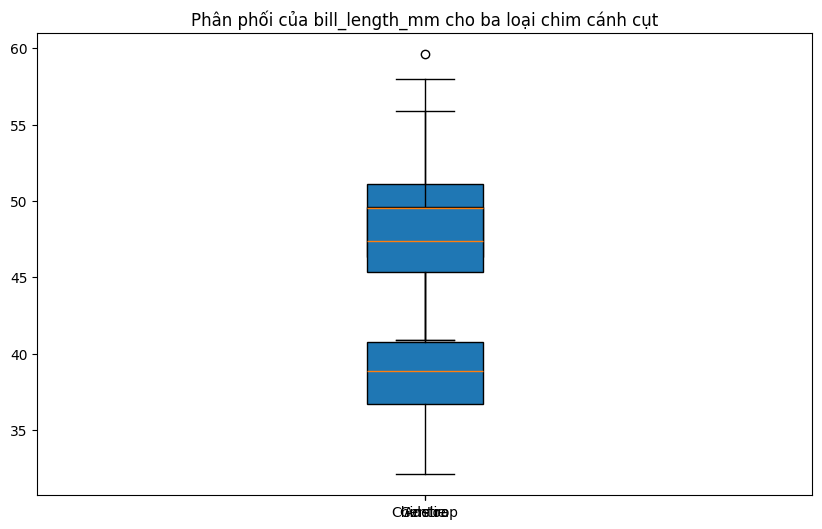

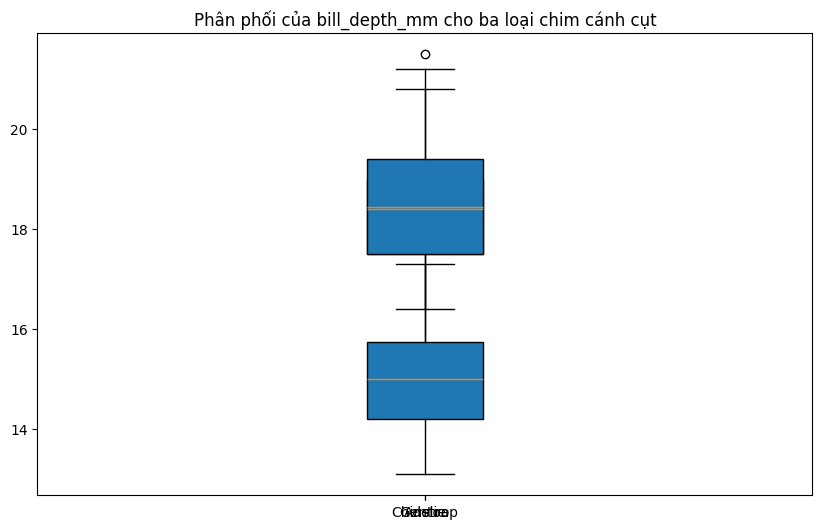

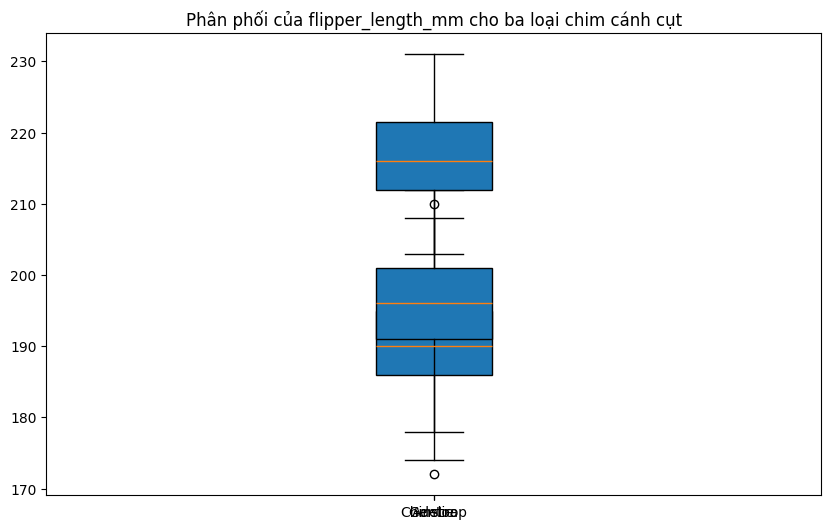

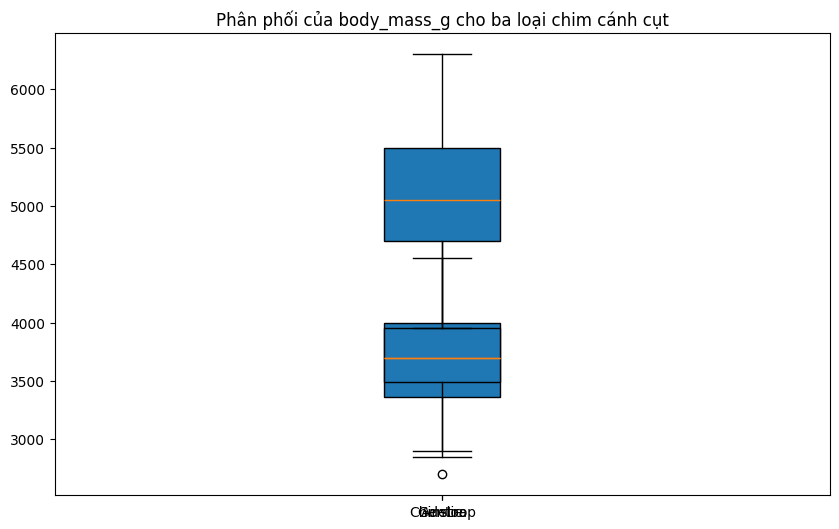

In [30]:
# 3. Vẽ đồ thị phù hợp thể hiện phân phối của ba loại chim cánh cụt, qua đó bạn hãy đưa ra bình luận của mình.

features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Tạo boxplot cho mỗi loài chim cánh cụt
    for species in df_penguins['species'].unique():
        species_data = df_penguins[df_penguins['species'] == species][feature]
        plt.boxplot(species_data, patch_artist=True, labels=[species])
    
    plt.title(f'Phân phối của {feature} cho ba loại chim cánh cụt')
    plt.show()